In [1]:
using ProRF, Printf, Statistics

In [2]:
R = RF("Data/TDP43")
RI = RFI(R, 8:1:20, 100:1:100)
X, Y, L = get_data(R, 'B');

In [3]:
size(X)

(53468, 84)

In [5]:
ans = Vector{Vector{Float64}}()
for i in 1:10
    println(i)
    data_state, learn_state = @seed, @seed
    nrmse_vector = Vector{Float64}()
    for d in 100:20:200
        push!(nrmse_vector, rf_nrmse(X, Y, 9, 200, max_depth=d, val_mode=true, data_state=data_state, learn_state=learn_state)[2])
    end
    push!(ans, nrmse_vector)
end
ans = Matrix{Float64}(hcat(ans...))
sans = std.(eachrow(ans))
mans = mean.(eachrow(ans))

1

2


3

4

5

6

7

8

9

10

6-element Vector{Float64}:
 0.08618717147298076
 0.08549776072140636
 0.08531309231770934
 0.08524278766162764
 0.08528369864978044
 0.08534754464906133

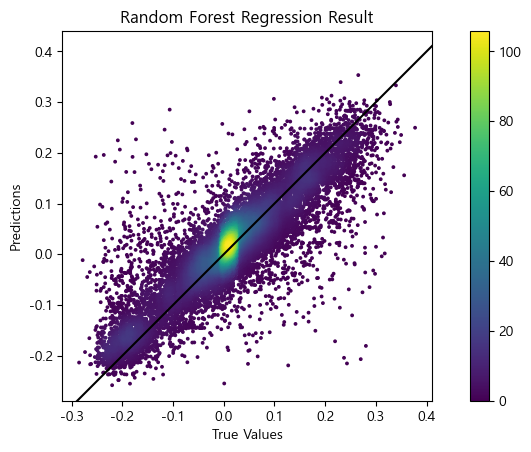

NRMSE : 0.085801


RandomForestRegressor
n_trees:             200
n_subfeatures:       9
partial_sampling:    0.7
max_depth:           160
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
ensemble:            Ensemble of Decision Trees
Trees:      200
Avg Leaves: 14485.23
Avg Depth:  160.0

In [3]:
rf_model(X, Y, 9, 200, max_depth=160)